<a href="https://colab.research.google.com/github/jadoon-talal/Artificial-Intelligence/blob/main/Lab_Task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 01**

## **Case Study:**
**Social Network Friend Suggestion using BFS**

---



Imagine you're building a social network feature that suggests "People You May Know" - friends
of friends who you're not already connected with. We'll use BFS to find these potential connections
up to 2 levels deep in the friendship graph.

In [1]:
from collections import deque, defaultdict

def suggest_friends(graph, user):
    visited = set()
    queue = deque()
    level = {user: 0}
    suggestions = set()

    visited.add(user)
    queue.append(user)

    while queue:
        current = queue.popleft()
        curr_level = level[current]

        if curr_level >= 2:
            continue  # Only go up to level 2

        for neighbor in graph[current]:
            if neighbor not in visited:
                visited.add(neighbor)
                level[neighbor] = curr_level + 1
                queue.append(neighbor)

                if level[neighbor] == 2 and neighbor not in graph[user]:
                    suggestions.add(neighbor)

    return suggestions

#Example Usage
# Define the social network graph (Adjacency List)
social_graph = {
    'Ahmed': ['Bilal', 'Danish'],
    'Bilal': ['Ahmed', 'Fahad', 'Hassan'],
    'Danish': ['Ahmed', 'Imran'],
    'Fahad': ['Bilal'],
    'Hassan': ['Bilal'],
    'Imran': ['Danish', 'Junaid'],
    'Junaid': ['Imran']
}

user = 'Ahmed'
suggested = suggest_friends(social_graph, user)

print(f"Suggested friends for {user}: {suggested}")


Suggested friends for Ahmed: {'Imran', 'Fahad', 'Hassan'}


# **Task 02**

**a. Implement Depth-First Search (DFS) to find paths between various cities in Pakistan.**


In [4]:
def dfs_path(graph, start, goal, path=None, visited=None):
    if path is None:
        path = []
    if visited is None:
        visited = set()

    path.append(start)
    visited.add(start)

    if start == goal:
        return path

    for neighbor in graph[start]:
        if neighbor not in visited:
            result = dfs_path(graph, neighbor, goal, path.copy(), visited.copy())
            if result is not None:
                return result

    return None

#Example Data-Set
pakistan_map = {
    'Lahore': ['Gujranwala', 'Faisalabad'],
    'Gujranwala': ['Lahore', 'Islamabad'],
    'Faisalabad': ['Lahore', 'Multan'],
    'Islamabad': ['Gujranwala', 'Peshawar'],
    'Peshawar': ['Islamabad'],
    'Multan': ['Faisalabad', 'Quetta'],
    'Quetta': ['Multan', 'Karachi'],
    'Karachi': ['Quetta']
}

#Example Usage
start_city = 'Lahore'
goal_city = 'Karachi'

path = dfs_path(pakistan_map, start_city, goal_city)

if path:
    print(f"Path from {start_city} to {goal_city}: {' -> '.join(path)}")
else:
    print(f"No path found from {start_city} to {goal_city}")


Path from Lahore to Karachi: Lahore -> Faisalabad -> Multan -> Quetta -> Karachi


**b. Python program to print DFS traversal from a given graph.**
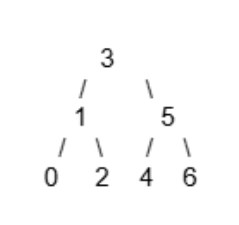


In [5]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

# Construct the binary tree from the image
root = Node(3)
root.left = Node(1)
root.right = Node(5)
root.left.left = Node(0)
root.left.right = Node(2)
root.right.left = Node(4)
root.right.right = Node(6)

# DFS (Pre-order Traversal)
def dfs_preorder(node):
    if node is None:
        return
    print(node.value, end=' ')
    dfs_preorder(node.left)
    dfs_preorder(node.right)

# Run DFS traversal
print("DFS Pre-order Traversal:")
dfs_preorder(root)


DFS Pre-order Traversal:
3 1 0 2 5 4 6 

# **Task 03**

**Write any case study for the A* Algorithm in AI also implement that case study in python
language.**


## **Algorithm for Finding the Shortest Route between Pakistani Cities**

**Problem Statement**

Imagine you are building a Pakistani route planner (like Google Maps) that helps users find the shortest path between two cities, using A*. The algorithm uses a heuristic (like straight-line distance) to improve the search.

###**A* Algorithm in AI**
A* is a popular pathfinding and graph traversal algorithm. It combines:

*   g(n): Actual cost to reach node n
*   h(n): Heuristic estimated cost from node n to goal

*   f(n) = g(n) + h(n)





### **Python Implementation**

In [7]:
import heapq

def a_star(graph, heuristics, start, goal):
    open_list = []
    heapq.heappush(open_list, (0 + heuristics[start], 0, start, [start]))  # (f, g, node, path)
    visited = set()

    while open_list:
        f, g, current, path = heapq.heappop(open_list)

        if current == goal:
            return path, g

        visited.add(current)

        for neighbor, cost in graph[current]:
            if neighbor not in visited:
                new_g = g + cost
                new_f = new_g + heuristics[neighbor]
                heapq.heappush(open_list, (new_f, new_g, neighbor, path + [neighbor]))

    return None, float('inf')

#Sample Map of Pakistani Cities

    # Graph structure: city -> [(neighbor, distance)]
graph = {
    'Lahore': [('Gujranwala', 70), ('Faisalabad', 120)],
    'Gujranwala': [('Lahore', 70), ('Islamabad', 200)],
    'Faisalabad': [('Lahore', 120), ('Multan', 250)],
    'Islamabad': [('Gujranwala', 200), ('Peshawar', 180)],
    'Multan': [('Faisalabad', 250), ('Quetta', 600)],
    'Quetta': [('Multan', 600), ('Karachi', 700)],
    'Karachi': [('Quetta', 700)],
    'Peshawar': [('Islamabad', 180)]
}

# Heuristic values: estimated distance to Karachi (in km)
heuristics = {
    'Lahore': 1200,
    'Gujranwala': 1150,
    'Faisalabad': 1000,
    'Islamabad': 1100,
    'Peshawar': 1300,
    'Multan': 850,
    'Quetta': 700,
    'Karachi': 0
}

#Run the A* Algorithm

start_city = 'Lahore'
goal_city = 'Karachi'

path, total_cost = a_star(graph, heuristics, start_city, goal_city)

if path:
    print(f"Shortest path from {start_city} to {goal_city}: {' -> '.join(path)}")
    print(f"Total cost: {total_cost} km")
else:
    print("No path found.")



Shortest path from Lahore to Karachi: Lahore -> Faisalabad -> Multan -> Quetta -> Karachi
Total cost: 1670 km
